In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# k-means pipeline PCA TSNE StandardScaler

# Part 1: Prepare the Data #
###### 1. Read myopia.csv into a Pandas DataFrame. ######
###### 2. Remove "MYOPIC" column from the dataset ######
###### 3. Standardise dataset. ######

In [6]:
df = pd.read_csv("Resources/myopia.csv")
df

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0,1
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1,0
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1,0
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0,0


In [7]:
data = df.drop(columns='MYOPIC')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AGE        618 non-null    int64  
 1   SPHEQ      618 non-null    float64
 2   AL         618 non-null    float64
 3   ACD        618 non-null    float64
 4   LT         618 non-null    float64
 5   VCD        618 non-null    float64
 6   SPORTHR    618 non-null    int64  
 7   READHR     618 non-null    int64  
 8   COMPHR     618 non-null    int64  
 9   STUDYHR    618 non-null    int64  
 10  TVHR       618 non-null    int64  
 11  DIOPTERHR  618 non-null    int64  
 12  MOMMY      618 non-null    int64  
 13  DADMY      618 non-null    int64  
dtypes: float64(5), int64(9)
memory usage: 67.7 KB


In [9]:
data_scaled = StandardScaler().fit_transform(data)

# Part 2: Apply Dimensionality Reduction #
###### 1. Perform dimensionality reduction with PCA. ######
How did the number of the features change?  For this assignment, preserve 90% of the explained variance in dimensionality reduction.
###### 2. Further reduce the dataset dimensions with t-SNE and visually inspect the results. ######
Run t-SNE on the principal components.
###### 3. Create a scatter plot of the t-SNE output. ######
Are there distinct clusters?

In [12]:
pca = PCA(n_components=0.9)
pca_data = pca.fit_transform(data_scaled)
pca_data.shape

(618, 10)

The number of features has reduced from 14 to 10.

In [13]:
tsne = TSNE(learning_rate=40)
data_tsne = tsne.fit_transform(pca_data)
data_tsne.shape

C:\Users\30798\anaconda3\envs\PythonData\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


(618, 2)

The number of features has reduced from 10 to 2.

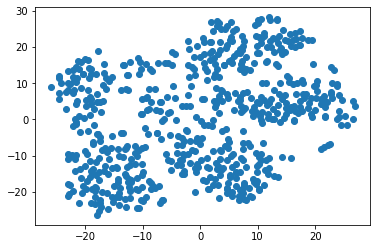

In [14]:
X = data_tsne[:,0]
y = data_tsne[:,1]
plt.scatter(X, y)
plt.show()

# Part 3: Perform a Cluster Analysis with K-means #
###### Create an elbow plot to identify the best number of clusters. ######
Use a for loop to determine the inertia for each k between 1 through 10.

If possible, determine where the elbow of the plot is, and at which value of k it appears.

In [15]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(data_tsne)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

C:\Users\30798\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  "KMeans is known to have a memory leak on Windows "


,k,inertia
0,1,234560.203125
1,2,121670.343750
2,3,77853.062500
3,4,53671.683594
4,5,36882.714844


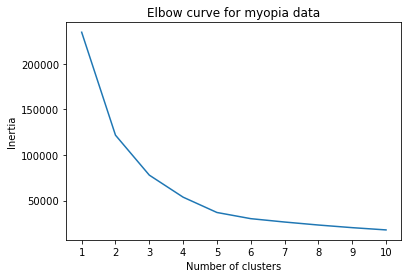

In [16]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for myopia data')
plt.show()

# Part 4: Make a Recommendation #
###### Can the patients be clustered? If so, into how many clusters? ######

The patients can be clustered into two, three or five clusters. My recommendation is five clusters.